# Greenland Ice Sheet Melting Prediction based on Linear Regression Model

### Importing Libraries

In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Loading Dataset

In [492]:
data = pd.read_excel(r"file:///C:/Users/mahes/Desktop/DATASET.GREENLAND.xlsx")
data = pd.DataFrame(data)

### Dataset Description

In [493]:
# Describing dataset structure and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     251 non-null    int64  
 1   CO2 CONCENTRATION [PPM]  171 non-null    float64
 2   CH4 CONCENTRATION [PPM]  171 non-null    float64
 3   N2O CONCENTRATION [PPM]  171 non-null    float64
 4   MEAN SEA LEVEL [CM]      171 non-null    float64
 5   POPULATION               251 non-null    int64  
 6   TEMPERATURE [°C]         171 non-null    float64
 7   GREENLAND ICE MASS [GT]  171 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 15.8 KB


In [494]:
# Dataset statistics
data.describe()

,YEAR,CO2 CONCENTRATION [PPM],CH4 CONCENTRATION [PPM],N2O CONCENTRATION [PPM],MEAN SEA LEVEL [CM],POPULATION,TEMPERATURE [°C],GREENLAND ICE MASS [GT]
count,251.000000,171.000000,171.000000,171.000000,171.000000,2.510000e+02,171.000000,1.710000e+02
mean,1975.000000,320.579532,1.173455,0.290741,5.390409,5.243516e+09,14.116561,2.809322e+06
std,72.601653,35.194750,0.371903,0.016815,7.267010,3.596103e+09,0.360485,8.528950e+03
min,1850.000000,284.700000,0.771000,0.270400,-3.150000,1.278456e+09,13.544000,2.794536e+06
25%,1912.500000,294.550000,0.856950,0.277650,-1.720000,1.823112e+09,13.838000,2.802002e+06
50%,1975.000000,309.400000,1.026000,0.286800,3.170000,4.079480e+09,14.043000,2.809322e+06
75%,2037.500000,337.600000,1.505900,0.300120,10.790000,9.046566e+09,14.269500,2.816643e+06
max,2100.000000,418.740000,1.876300,0.333900,23.010000,1.087539e+10,15.158000,2.823963e+06


### Dataset Cleaning

In [495]:
print("\n\nNOTE: The data is manually scrapped form the research articles and NASA databases. Hence, it is very clean.")
print("      Therefore, no data cleaning operations were performed.\n")



NOTE: The data is manually scrapped form the research articles and NASA databases. Hence, it is very clean.
      Therefore, no data cleaning operations were performed.



## Exploratory Data Analysis

In [496]:
# Dataset from year 1850 to 2100
pd.set_option("max_rows", None)
data.head(251)

,YEAR,CO2 CONCENTRATION [PPM],CH4 CONCENTRATION [PPM],N2O CONCENTRATION [PPM],MEAN SEA LEVEL [CM],POPULATION,TEMPERATURE [°C],GREENLAND ICE MASS [GT]
0,1850,284.70,0.77400,0.27040,-2.35,1278456221,13.688,2.823963e+06
1,1851,284.90,0.77700,0.27040,-2.37,1281762948,13.804,2.823791e+06
2,1852,285.00,0.77800,0.27040,-2.39,1284301245,13.809,2.823619e+06
3,1853,285.10,0.77540,0.27040,-2.41,1286078570,13.785,2.823447e+06
4,1854,285.30,0.77100,0.27050,-2.42,1287967885,13.833,2.823274e+06
5,1855,285.40,0.78000,0.27060,-2.44,1289970666,13.853,2.823102e+06
6,1856,285.60,0.77590,0.27080,-2.48,1292088418,13.736,2.822930e+06
7,1857,285.70,0.77900,0.27100,-2.51,1294322726,13.594,2.822758e+06
8,1858,285.90,0.78600,0.27120,-2.53,1296675259,13.750,2.822585e+06
9,1859,286.10,0.78700,0.27150,-2.57,1299404290,13.821,2.822413e+06


### Trends

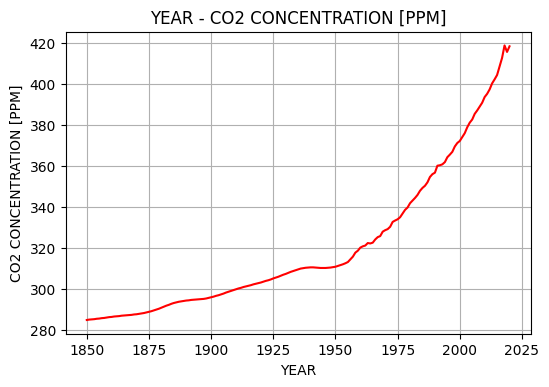

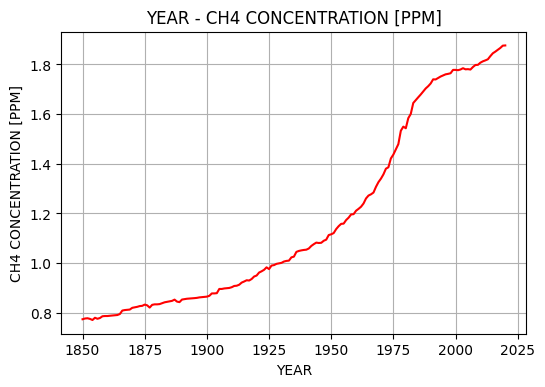

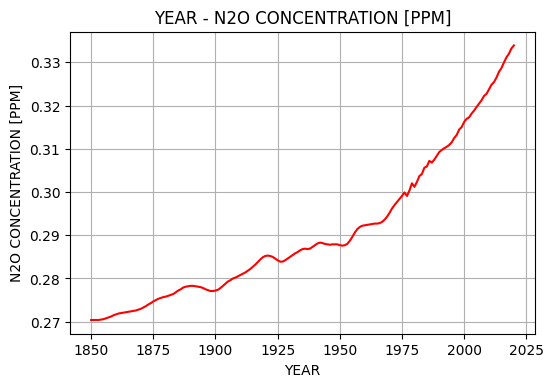

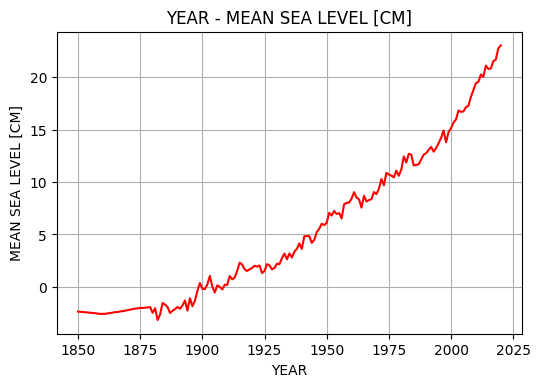

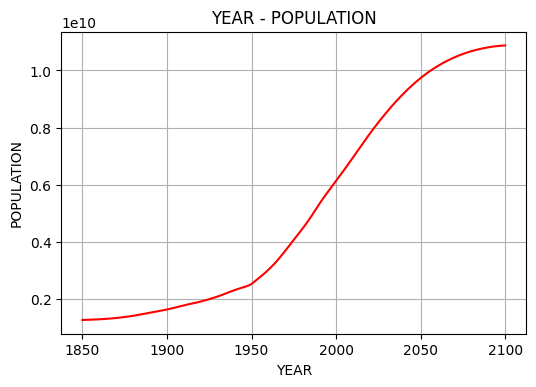

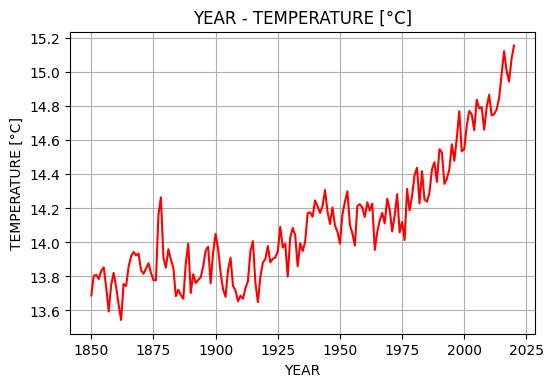

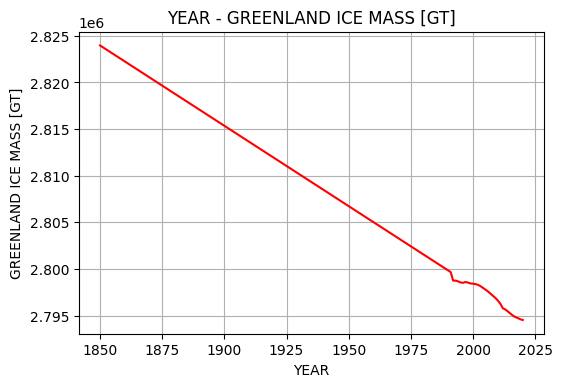

In [497]:
# Plotting YEAR against CO2 CONCENTRATION [PPM]
plt.figure("1", dpi = 100)
plt.plot(data["YEAR"], data["CO2 CONCENTRATION [PPM]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("CO2 CONCENTRATION [PPM]")
plt.title("YEAR - CO2 CONCENTRATION [PPM]")
plt.grid()
plt.show()

# Plotting YEAR against CH4 CONCENTRATION [PPM]
plt.figure("2", dpi = 100)
plt.plot(data["YEAR"], data["CH4 CONCENTRATION [PPM]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("CH4 CONCENTRATION [PPM]")
plt.title("YEAR - CH4 CONCENTRATION [PPM]")
plt.grid()
plt.show()

# Plotting YEAR against N2O CONCENTRATION [PPM]
plt.figure("3", dpi = 100)
plt.plot(data["YEAR"], data["N2O CONCENTRATION [PPM]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("N2O CONCENTRATION [PPM]")
plt.title("YEAR - N2O CONCENTRATION [PPM]")
plt.grid()
plt.show()

# Plotting YEAR against MEAN SEA LEVEL [CM]
plt.figure("4", dpi = 100)
plt.plot(data["YEAR"], data["MEAN SEA LEVEL [CM]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("MEAN SEA LEVEL [CM]")
plt.title("YEAR - MEAN SEA LEVEL [CM]")
plt.grid()
plt.show()

# Plotting YEAR against POPULATION
plt.figure("5", dpi = 100)
plt.plot(data["YEAR"], data["POPULATION"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("POPULATION")
plt.title("YEAR - POPULATION")
plt.grid()
plt.show()

# Plotting YEAR against TEMPERATURE [°C]
plt.figure("6", dpi = 100)
plt.plot(data["YEAR"], data["TEMPERATURE [°C]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("TEMPERATURE [°C]")
plt.title("YEAR - TEMPERATURE [°C]")
plt.grid()
plt.show()

# Plotting YEAR against GREENLAND ICE MASS [GT]
plt.figure("7", dpi = 100)
plt.plot(data["YEAR"], data["GREENLAND ICE MASS [GT]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("GREENLAND ICE MASS [GT]")
plt.title("YEAR - GREENLAND ICE MASS [GT]")
plt.grid()
plt.show()

### Correlation Matrix

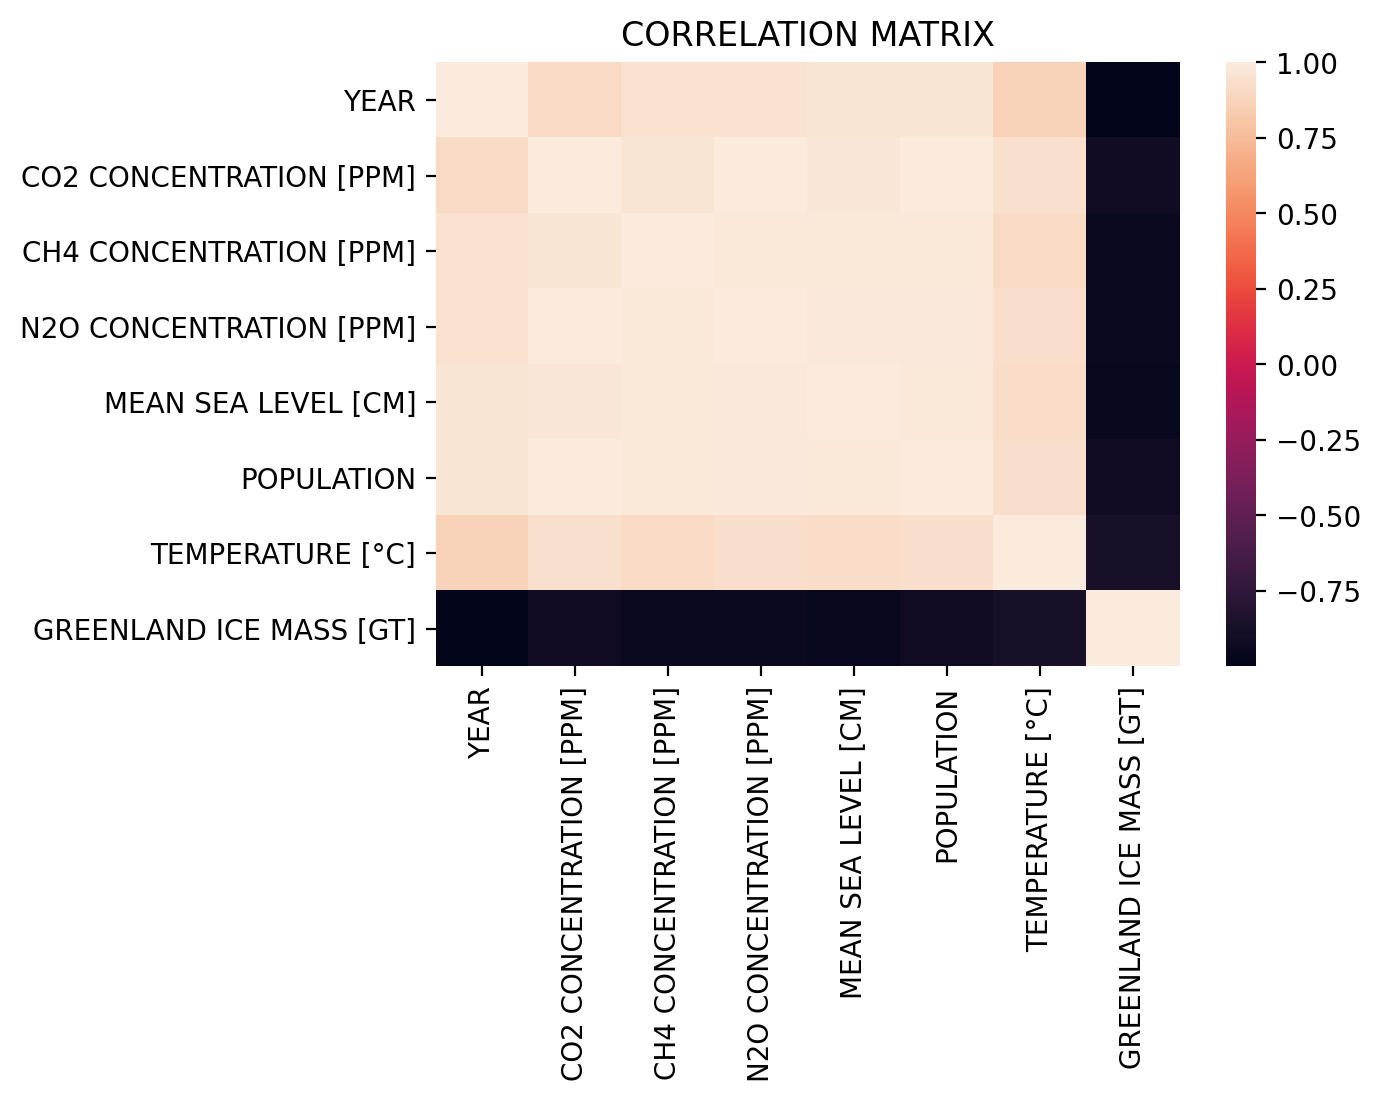



OBSERVATION: It can be clearly observed from the heatmap that all the variables are highly correlated to each
             other. Also, it is to be noted that, the GREENLAND ICE MASS [GT], is inversely propotional to all
             the other variables.



In [498]:
# Plotting the correlation between different variables of the dataset using a heatmap
plt.figure("8", dpi = 200)
sb.heatmap(data.corr())
plt.title("CORRELATION MATRIX")
plt.show()

# Commenting the observables from the heatmap
print("\n\nOBSERVATION: It can be clearly observed from the heatmap that all the variables are highly correlated to each")
print("             other. Also, it is to be noted that, the GREENLAND ICE MASS [GT], is inversely propotional to all")
print("             the other variables.\n")

## Linear Regression Model

### Model for Carbon Dioxide Emission based on Year and  Population

In [499]:
# In this step, we will only consider Year-CarbonDioxide-Population for the model generation
# It is to be noted that, CarbonDioxide is the dependent variable and others are independent variables

# Creating empty lists, "n" for indexing and "p" for storing the predicted values
n = []
p = []

# Creating a loop to train-test_predict_append_repeat the dataset

# Step-1_The model will be trained and tested on 170 datapoints from three known variables in the dataset
# Step-2_This model will then predict the 171(st) unknown dependent variable from the respective known independent variables
# Step-3_The predicted value will get appended to the loaded dataset in its respective cell
# Step-4_The model will be trained and tested on the updated dataset containing 171 known variables
# Step-5_The above mentioned steps will be repeated (80 times) until we have complete dataset for all the three variables 

# A for-loop running from 171(st) to 250(th) data point, replacing NaN values one at a time 
for i in np.arange(171, 251, 1):
    
    # Empty list "n" will get appended for indexing purpose
    n.append(i)
    
    # Dataset splitting between Test(20%) and Train(80%) using CO2 CONCENTRATION [PPM] as dependent variable
    # The Non-NaN values of the dataset are only used for training and testing
    X = data.dropna()[["YEAR", "POPULATION"]]
    Y = data.dropna()[["CO2 CONCENTRATION [PPM]"]]
    
    # To facilitate reproducing the same results, the random state is set to "10"
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

    # Linear-Regression Model
    model = LinearRegression()
    
    # Fitting the model on the training dataset
    model.fit(X_train, Y_train)
    
    # Predicting the testing dataset
    Y_pred = model.predict(X_test)
    
    # Creating a new variable "y" for indexing purpose
    y = i - 171
    
    # Appending the predicted data point to the list "p" 
    p.append(model.predict([[data.iloc[i]["YEAR"], data.iloc[i]["POPULATION"]]]))
    
    # Appending the predicted data point to its respective cell in the dataset
    data.at[i, "CO2 CONCENTRATION [PPM]"] = p[y][0][0]

### Model for Methane Emission based on Year, Carbon Dioxide Emission and  Population

In [500]:
# In this step, we will only consider Year-CarbonDioxide-Methane-Population for the model generation
# It is to be noted that, Methane is the dependent variable and others are independent variables

# Creating empty lists, "n" for indexing and "p" for storing the predicted values
n = []
p = []

# Creating a loop to train-test_predict_append_repeat the dataset

# Step-1_The model will be trained and tested on 170 datapoints from three known variables in the dataset
# Step-2_This model will then predict the 171(st) unknown dependent variable from the respective known independent variables
# Step-3_The predicted value will get appended to the loaded dataset in its respective cell
# Step-4_The model will be trained and tested on the updated dataset containing 171 known variables
# Step-5_The above mentioned steps will be repeated (80 times) until we have complete dataset for all the three variables 

# A for-loop running from 171(st) to 250(th) data point, replacing NaN values one at a time 
for i in np.arange(171, 251, 1):
    
    # Empty list "n" will get appended for indexing purpose
    n.append(i)
    
    # Dataset splitting between Test(20%) and Train(80%) using CH4 CONCENTRATION [PPM] as dependent variable
    # The Non-NaN values of the dataset are only used for training and testing
    X = data.dropna()[["YEAR", "POPULATION", "CO2 CONCENTRATION [PPM]"]]
    Y = data.dropna()[["CH4 CONCENTRATION [PPM]"]]

    # To facilitate reproducing the same results, the random state is set to "10"
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

    # Linear-Regression Model
    model = LinearRegression()
    
    # Fitting the model on the training dataset
    model.fit(X_train, Y_train)
    
    # Predicting the testing dataset
    Y_pred = model.predict(X_test)
    
    # Creating a new variable "y" for indexing purpose
    y = i - 171
    
    # Appending the predicted data point to the list "p" 
    p.append(model.predict([[data.iloc[i]["YEAR"], data.iloc[i]["POPULATION"], data.iloc[i]["CO2 CONCENTRATION [PPM]"]]]))
    
    # Appending the predicted data point to its respective cell in the dataset
    data.at[i, "CH4 CONCENTRATION [PPM]"] = p[y][0][0]

### Model for Nitrous Oxide Emission based on Year, Carbon Dioxide Emission, Methane Emission and  Population

In [501]:
# In this step, we will only consider Year-CarbonDioxide-Methane-NitrousOxide-Population for the model generation
# It is to be noted that, NitrousOxide is the dependent variable and others are independent variables

# Creating empty lists, "n" for indexing and "p" for storing the predicted values
n = []
p = []

# Creating a loop to train-test_predict_append_repeat the dataset

# Step-1_The model will be trained and tested on 170 datapoints from three known variables in the dataset
# Step-2_This model will then predict the 171(st) unknown dependent variable from the respective known independent variables
# Step-3_The predicted value will get appended to the loaded dataset in its respective cell
# Step-4_The model will be trained and tested on the updated dataset containing 171 known variables
# Step-5_The above mentioned steps will be repeated (80 times) until we have complete dataset for all the three variables 

# A for-loop running from 171(st) to 250(th) data point, replacing NaN values one at a time 
for i in np.arange(171, 251, 1):
    
    # Empty list "n" will get appended for indexing purpose
    n.append(i)
    
    # Dataset splitting between Test(20%) and Train(80%) using N2O CONCENTRATION [PPM] as dependent variable
    # The Non-NaN values of the dataset are only used for training and testing
    X = data.dropna()[["YEAR", "POPULATION", "CO2 CONCENTRATION [PPM]", "CH4 CONCENTRATION [PPM]"]]
    Y = data.dropna()[["N2O CONCENTRATION [PPM]"]]

    # To facilitate reproducing the same results, the random state is set to "10"
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

    # Linear-Regression Model
    model = LinearRegression()
    
    # Fitting the model on the training dataset
    model.fit(X_train, Y_train)
    
    # Predicting the testing dataset
    Y_pred = model.predict(X_test)
    
    # Creating a new variable "y" for indexing purpose
    y = i - 171
    
    # Appending the predicted data point to the list "p" 
    p.append(model.predict([[data.iloc[i]["YEAR"], data.iloc[i]["POPULATION"], data.iloc[i]["CO2 CONCENTRATION [PPM]"],
                             data.iloc[i]["CH4 CONCENTRATION [PPM]"]]]))

    # Appending the predicted data point to its respective cell in the dataset    
    data.at[i, "N2O CONCENTRATION [PPM]"] = p[y][0][0]

### Model for Temperature based on Year, Carbon Dioxide Emission, Methane Emission, Nitrous Oxide Emission and  Population

In [502]:
# In this step, we will only consider Year-CarbonDioxide-Methane-NitrousOxide-Population-Temperature for the model generation
# It is to be noted that, Temperature is the dependent variable and others are independent variables

# Creating empty lists, "n" for indexing and "p" for storing the predicted values
n = []
p = []

# Creating a loop to train-test_predict_append_repeat the dataset

# Step-1_The model will be trained and tested on 170 datapoints from three known variables in the dataset
# Step-2_This model will then predict the 171(st) unknown dependent variable from the respective known independent variables
# Step-3_The predicted value will get appended to the loaded dataset in its respective cell
# Step-4_The model will be trained and tested on the updated dataset containing 171 known variables
# Step-5_The above mentioned steps will be repeated (80 times) until we have complete dataset for all the three variables 

# A for-loop running from 171(st) to 250(th) data point, replacing NaN values one at a time 
for i in np.arange(171, 251, 1):
    
    # Empty list "n" will get appended for indexing purpose
    n.append(i)
    
    # Dataset splitting between Test(20%) and Train(80%) using TEMPERATURE [°C] as dependent variable
    # The Non-NaN values of the dataset are only used for training and testing
    X = data.dropna()[["YEAR", "POPULATION", "CO2 CONCENTRATION [PPM]", "CH4 CONCENTRATION [PPM]", "N2O CONCENTRATION [PPM]"]]
    Y = data.dropna()[["TEMPERATURE [°C]"]]

    # To facilitate reproducing the same results, the random state is set to "10"
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

    # Linear-Regression Model
    model = LinearRegression()
    
    # Fitting the model on the training dataset
    model.fit(X_train, Y_train)
    
    # Predicting the testing dataset
    Y_pred = model.predict(X_test)
    
    # Creating a new variable "y" for indexing purpose
    y = i - 171
    
    # Appending the predicted data point to the list "p" 
    p.append(model.predict([[data.iloc[i]["YEAR"], data.iloc[i]["POPULATION"], data.iloc[i]["CO2 CONCENTRATION [PPM]"],
                             data.iloc[i]["CH4 CONCENTRATION [PPM]"], data.iloc[i]["N2O CONCENTRATION [PPM]"]]]))
    
    # Appending the predicted data point to its respective cell in the dataset        
    data.at[i, "TEMPERATURE [°C]"] = p[y][0][0]

### Model for Mean Sea Level based on Year, Carbon Dioxide Emission, Methane Emission, Nitrous Oxide Emission, Population and Temperature

In [503]:
# In this step, we will only consider Year-GreenhouseGas-Population-Temperature-MeanSeaLevel for the model generation
# It is to be noted that, MeanSeaLevel is the dependent variable and others are independent variables

# Creating empty lists, "n" for indexing and "p" for storing the predicted values
n = []
p = []

# Creating a loop to train-test_predict_append_repeat the dataset

# Step-1_The model will be trained and tested on 170 datapoints from three known variables in the dataset
# Step-2_This model will then predict the 171(st) unknown dependent variable from the respective known independent variables
# Step-3_The predicted value will get appended to the loaded dataset in its respective cell
# Step-4_The model will be trained and tested on the updated dataset containing 171 known variables
# Step-5_The above mentioned steps will be repeated (80 times) until we have complete dataset for all the three variables 

# A for-loop running from 171(st) to 250(th) data point, replacing NaN values one at a time 
for i in np.arange(171, 251, 1):
    
    # Empty list "n" will get appended for indexing purpose
    n.append(i)
    
    # Dataset splitting between Test(20%) and Train(80%) using MEAN SEA LEVEL [CM] as dependent variable
    # The Non-NaN values of the dataset are only used for training and testing
    X = data.dropna()[["YEAR", "POPULATION", "CO2 CONCENTRATION [PPM]", "CH4 CONCENTRATION [PPM]", "N2O CONCENTRATION [PPM]",
                       "TEMPERATURE [°C]"]]
    Y = data.dropna()[["MEAN SEA LEVEL [CM]"]]

    # To facilitate reproducing the same results, the random state is set to "10"   
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

    # Linear-Regression Model
    model = LinearRegression()
    
    # Fitting the model on the training dataset
    model.fit(X_train, Y_train)
    
    # Predicting the testing dataset
    Y_pred = model.predict(X_test)
    
    # Creating a new variable "y" for indexing purpose
    y = i - 171
    
    # Appending the predicted data point to the list "p" 
    p.append(model.predict([[data.iloc[i]["YEAR"], data.iloc[i]["POPULATION"], data.iloc[i]["CO2 CONCENTRATION [PPM]"],
                             data.iloc[i]["CH4 CONCENTRATION [PPM]"], data.iloc[i]["N2O CONCENTRATION [PPM]"],
                             data.iloc[i]["TEMPERATURE [°C]"]]]))

    # Appending the predicted data point to its respective cell in the dataset            
    data.at[i, "MEAN SEA LEVEL [CM]"] = p[y][0][0]

### Model for Greenland Ice Mass based on Year, Carbon Dioxide Emission, Methane Emission, Nitrous Oxide Emission, Mean Sea Level, Population and Temperature

In [504]:
# In this step, we will only consider Year-GreenhouseGas-Population-Temperature-MeanSeaLevel-GLIceMass for the model generation
# It is to be noted that, GreenlandIceMass is the dependent variable and others are independent variables

# Creating empty lists, "n" for indexing and "p" for storing the predicted values
n = []
p = []

# Creating a loop to train-test_predict_append_repeat the dataset

# Step-1_The model will be trained and tested on 170 datapoints from three known variables in the dataset
# Step-2_This model will then predict the 171(st) unknown dependent variable from the respective known independent variables
# Step-3_The predicted value will get appended to the loaded dataset in its respective cell
# Step-4_The model will be trained and tested on the updated dataset containing 171 known variables
# Step-5_The above mentioned steps will be repeated (80 times) until we have complete dataset for all the three variables 

# A for-loop running from 171(st) to 250(th) data point, replacing NaN values one at a time 
for i in np.arange(171, 251, 1):
    
    # Empty list "n" will get appended for indexing purpose
    n.append(i)
    
    # Dataset splitting between Test(20%) and Train(80%) using GREENLAND ICE MASS [GT] as dependent variable
    # The Non-NaN values of the dataset are only used for training and testing    
    X = data.dropna()[["YEAR", "POPULATION", "CO2 CONCENTRATION [PPM]", "CH4 CONCENTRATION [PPM]", "N2O CONCENTRATION [PPM]",
                       "TEMPERATURE [°C]", "MEAN SEA LEVEL [CM]"]]
    Y = data.dropna()[["GREENLAND ICE MASS [GT]"]]

    # To facilitate reproducing the same results, the random state is set to "10"        
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

    # Linear-Regression Model
    model = LinearRegression()
    
    # Fitting the model on the training dataset
    model.fit(X_train, Y_train)
    
    # Predicting the testing dataset
    Y_pred = model.predict(X_test)
    
    # Creating a new variable "y" for indexing purpose
    y = i - 171
    
    # Appending the predicted data point to the list "p" 
    p.append(model.predict([[data.iloc[i]["YEAR"], data.iloc[i]["POPULATION"], data.iloc[i]["CO2 CONCENTRATION [PPM]"],
                             data.iloc[i]["CH4 CONCENTRATION [PPM]"], data.iloc[i]["N2O CONCENTRATION [PPM]"],
                             data.iloc[i]["TEMPERATURE [°C]"], data.iloc[i]["MEAN SEA LEVEL [CM]"]]]))

    # Appending the predicted data point to its respective cell in the dataset                
    data.at[i, "GREENLAND ICE MASS [GT]"] = p[y][0][0]

## Model Evaluation [Completed/Updated Dataset]

In [505]:
# In this step, we will evaluate the model with the complete dataset (with artificially generated datapoints)

# Dataset splitting between Test(20%) and Train(80%) using GREENLAND ICE MASS [GT] as dependent variable
X = data.dropna()[["YEAR", "POPULATION", "CO2 CONCENTRATION [PPM]", "CH4 CONCENTRATION [PPM]", "N2O CONCENTRATION [PPM]",
                   "TEMPERATURE [°C]", "MEAN SEA LEVEL [CM]"]]
Y = data.dropna()[["GREENLAND ICE MASS [GT]"]]

# To facilitate reproducing the same results, the random state is set to "3"       
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# Linear-Regression Model
model = LinearRegression()

# Fitting the model on the training dataset
model.fit(X_train, Y_train)

# Predicting the testing dataset
Y_pred = model.predict(X_test)

# Estimating the model parameters
print("\nModel Intercept:",model.intercept_,"\n")
print("\nModel Coefficient:",model.coef_,"\n")

# Using R-Squared value for evaluating the model performance
print("\nR2 Score:",r2_score(Y_test, Y_pred),"\n")

# Estimating the training loss using the mean squared error cost function
print("\nTraining Loss:",(np.mean((Y_train-(model.predict(X_train)))**2)/len(X_train)).values[0],"_GREENLAND ICE MASS [GT]\n")

# Estimating the validation loss using the mean squared error cost function
print("\nValidation Loss:",(np.mean((Y_test-Y_pred)**2)/len(X_test)).values[0],"_GREENLAND ICE MASS [GT]\n")

# Commenting the observations
print("\n\nOBSERVATION: 1] Our model has a very high R2 score, that makes our model accurate.")
print("             2] Our model has very slightly higher Validation Loss compared that of the Training Loss.")
print("                This implies that we have a near perfect fit.\n\n")


Model Intercept: [3137467.51341347] 


Model Coefficient: [[-1.68870949e+02  9.58763051e-07 -4.82051886e+01 -2.17191402e+03
   3.82004284e+04  1.93828753e+02 -3.08259638e+01]] 


R2 Score: 0.9999601040650097 


Training Loss: 82.70975636447524 _GREENLAND ICE MASS [GT]


Validation Loss: 118.33942597377964 _GREENLAND ICE MASS [GT]



OBSERVATION: 1] Our model has a very high R2 score, that makes our model accurate.
             2] Our model has very slightly higher Validation Loss compared that of the Training Loss.
                This implies that we have a near perfect fit.




## Exploratory Data Analysis [Completed/Updated Dataset]

### Trends

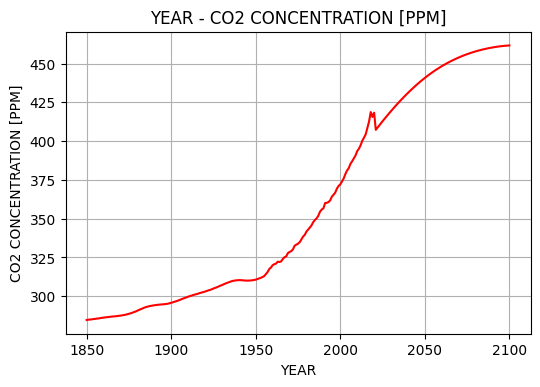

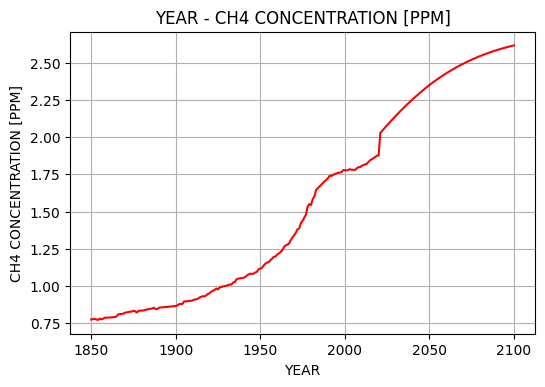

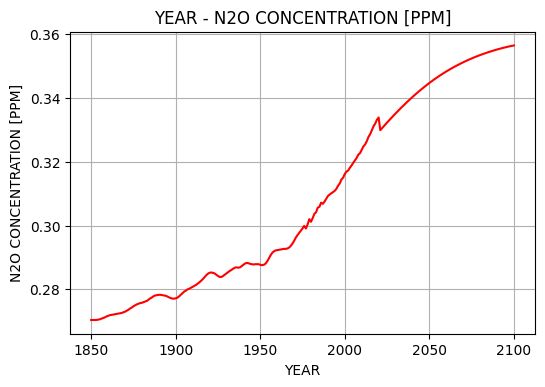

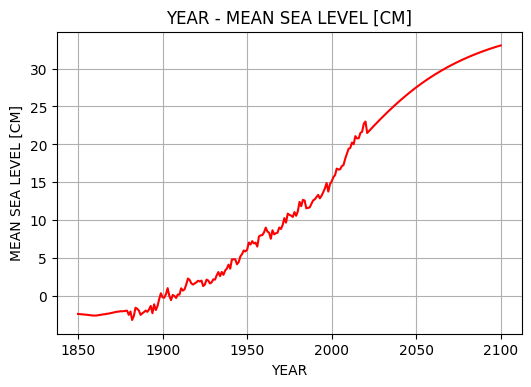

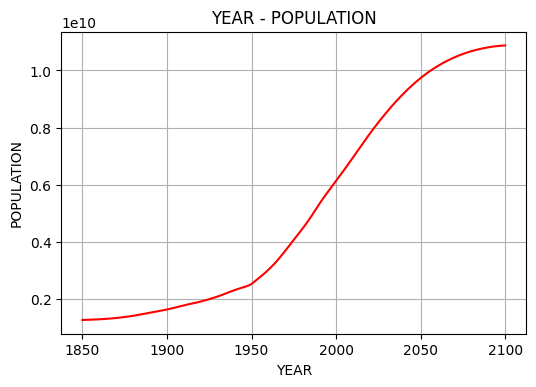

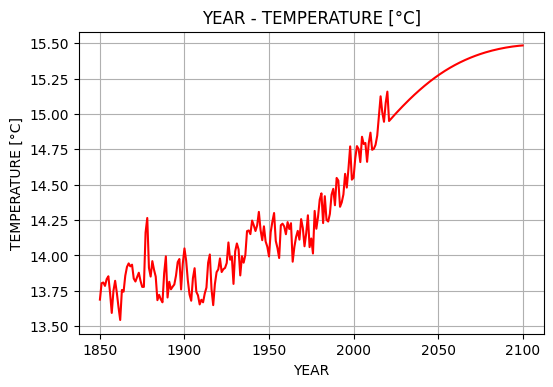

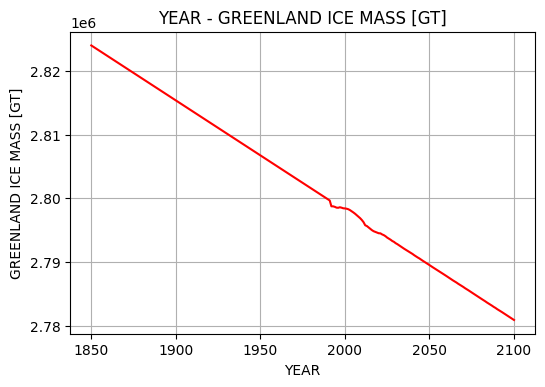

In [506]:
# Plotting YEAR against CO2 CONCENTRATION [PPM]
plt.figure("9", dpi = 100)
plt.plot(data["YEAR"], data["CO2 CONCENTRATION [PPM]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("CO2 CONCENTRATION [PPM]")
plt.title("YEAR - CO2 CONCENTRATION [PPM]")
plt.grid()
plt.show()

# Plotting YEAR against CH4 CONCENTRATION [PPM]
plt.figure("10", dpi = 100)
plt.plot(data["YEAR"], data["CH4 CONCENTRATION [PPM]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("CH4 CONCENTRATION [PPM]")
plt.title("YEAR - CH4 CONCENTRATION [PPM]")
plt.grid()
plt.show()

# Plotting YEAR against N2O CONCENTRATION [PPM]
plt.figure("11", dpi = 100)
plt.plot(data["YEAR"], data["N2O CONCENTRATION [PPM]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("N2O CONCENTRATION [PPM]")
plt.title("YEAR - N2O CONCENTRATION [PPM]")
plt.grid()
plt.show()

# Plotting YEAR against MEAN SEA LEVEL [CM]
plt.figure("12", dpi = 100)
plt.plot(data["YEAR"], data["MEAN SEA LEVEL [CM]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("MEAN SEA LEVEL [CM]")
plt.title("YEAR - MEAN SEA LEVEL [CM]")
plt.grid()
plt.show()

# Plotting YEAR against POPULATION
plt.figure("13", dpi = 100)
plt.plot(data["YEAR"], data["POPULATION"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("POPULATION")
plt.title("YEAR - POPULATION")
plt.grid()
plt.show()

# Plotting YEAR against TEMPERATURE [°C]
plt.figure("14", dpi = 100)
plt.plot(data["YEAR"], data["TEMPERATURE [°C]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("TEMPERATURE [°C]")
plt.title("YEAR - TEMPERATURE [°C]")
plt.grid()
plt.show()

# Plotting YEAR against GREENLAND ICE MASS [GT]
plt.figure("15", dpi = 100)
plt.plot(data["YEAR"], data["GREENLAND ICE MASS [GT]"], color = "red")
plt.xlabel("YEAR")
plt.ylabel("GREENLAND ICE MASS [GT]")
plt.title("YEAR - GREENLAND ICE MASS [GT]")
plt.grid()
plt.show()

### Correlation Matrix

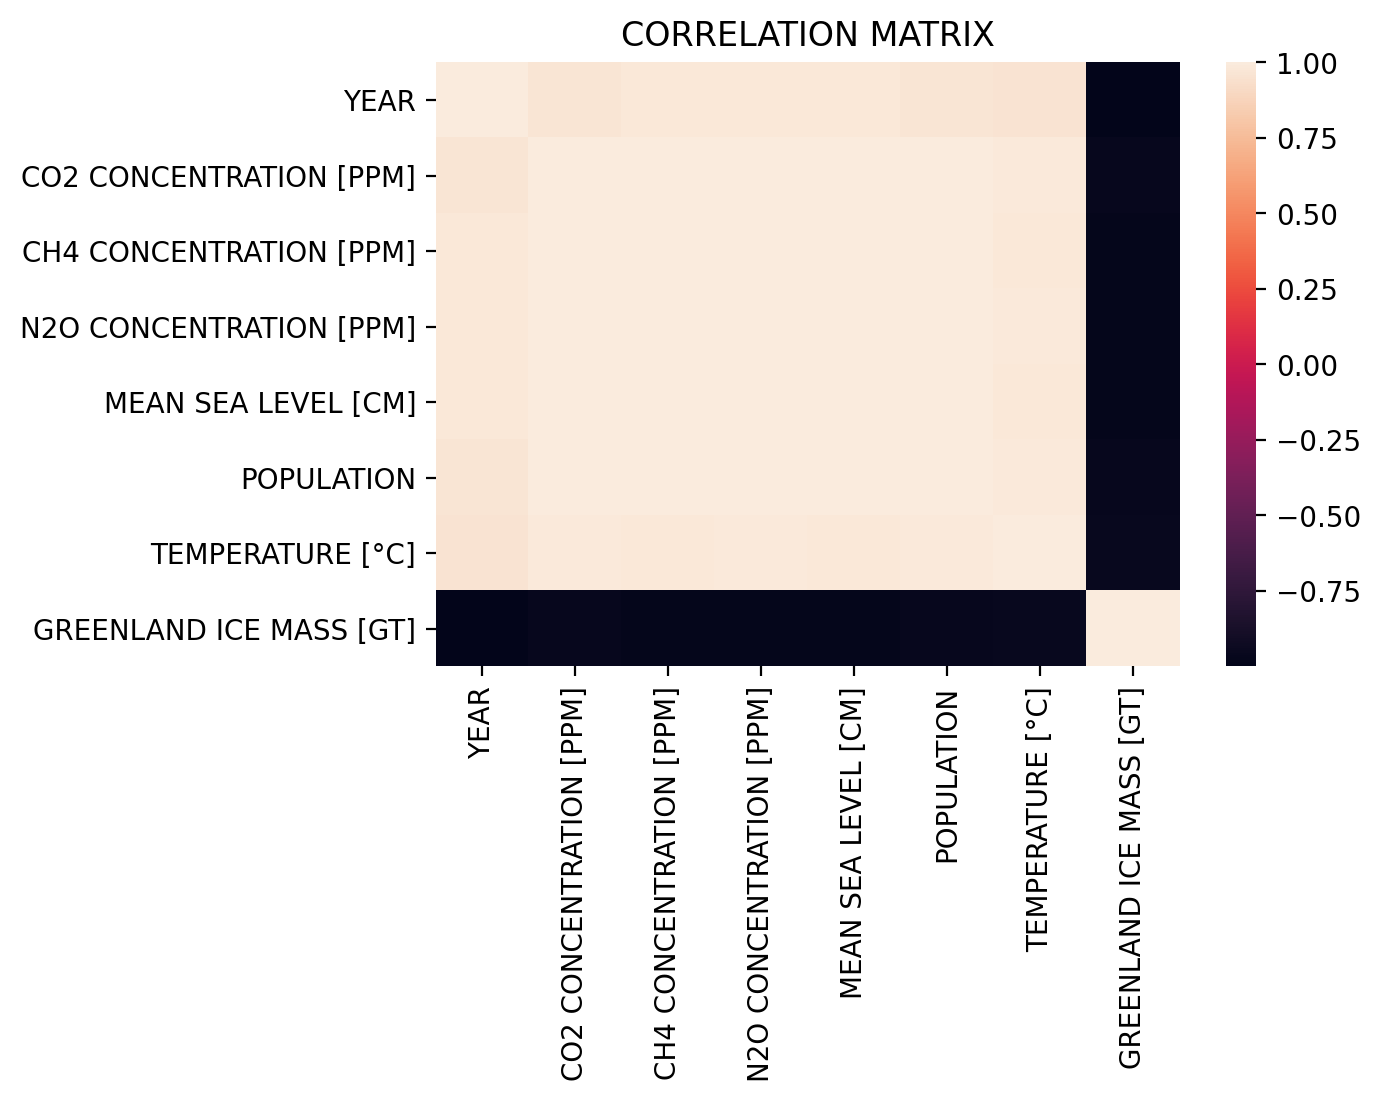



OBSERVATION: It can be clearly observed from the heatmap that all the variables are highly correlated to each
             other. Also, it is to be noted that, the GREENLAND ICE MASS [GT], is inversely propotional to all
             the other variables.



In [507]:
# Plotting the correlation between different variables of the dataset using a heatmap
plt.figure("16", dpi = 200)
sb.heatmap(data.corr())
plt.title("CORRELATION MATRIX")
plt.show()

# Commenting the observables from the heatmap
print("\n\nOBSERVATION: It can be clearly observed from the heatmap that all the variables are highly correlated to each")
print("             other. Also, it is to be noted that, the GREENLAND ICE MASS [GT], is inversely propotional to all")
print("             the other variables.\n")

In [508]:
# Updated dataset from year 1850 to 2100
data.head(251)

,YEAR,CO2 CONCENTRATION [PPM],CH4 CONCENTRATION [PPM],N2O CONCENTRATION [PPM],MEAN SEA LEVEL [CM],POPULATION,TEMPERATURE [°C],GREENLAND ICE MASS [GT]
0,1850,284.700000,0.774000,0.270400,-2.350000,1278456221,13.688000,2.823963e+06
1,1851,284.900000,0.777000,0.270400,-2.370000,1281762948,13.804000,2.823791e+06
2,1852,285.000000,0.778000,0.270400,-2.390000,1284301245,13.809000,2.823619e+06
3,1853,285.100000,0.775400,0.270400,-2.410000,1286078570,13.785000,2.823447e+06
4,1854,285.300000,0.771000,0.270500,-2.420000,1287967885,13.833000,2.823274e+06
5,1855,285.400000,0.780000,0.270600,-2.440000,1289970666,13.853000,2.823102e+06
6,1856,285.600000,0.775900,0.270800,-2.480000,1292088418,13.736000,2.822930e+06
7,1857,285.700000,0.779000,0.271000,-2.510000,1294322726,13.594000,2.822758e+06
8,1858,285.900000,0.786000,0.271200,-2.530000,1296675259,13.750000,2.822585e+06
9,1859,286.100000,0.787000,0.271500,-2.570000,1299404290,13.821000,2.822413e+06
